In [1]:
from pprint import pprint
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from pylab import *
import keyword

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'

### Reading Dataset

In [2]:
df = pd.read_csv('sat_scores.csv')

### Checking the datatypes

In [3]:
df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

In [4]:
df.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


In [5]:
df.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


### Plotting examples

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


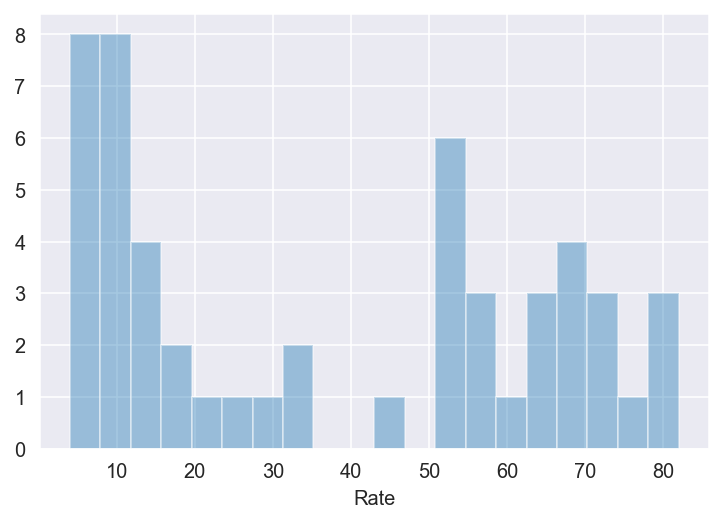

In [6]:
sns.set_style(style = 'darkgrid')# white, dark, whitegrid, darkgrid, ticks
sns.distplot(df['Rate'],bins=20,kde=False)
plt.show()

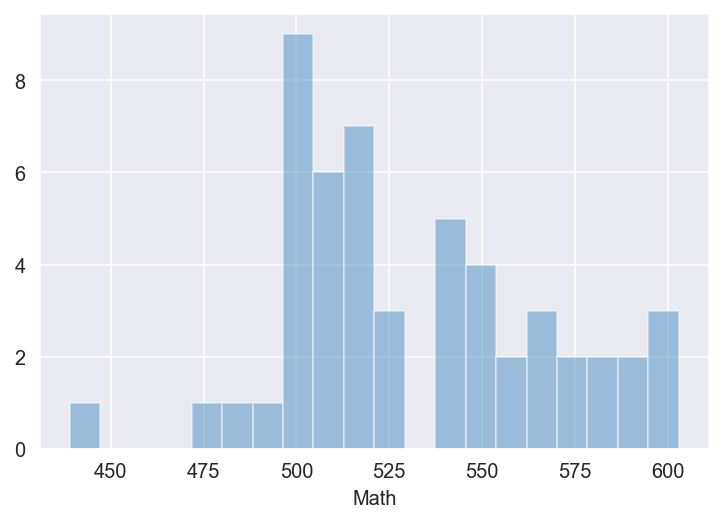

In [7]:
sns.set_style(style = 'darkgrid')
sns.distplot(df['Math'],bins=20,kde=False)
plt.show()

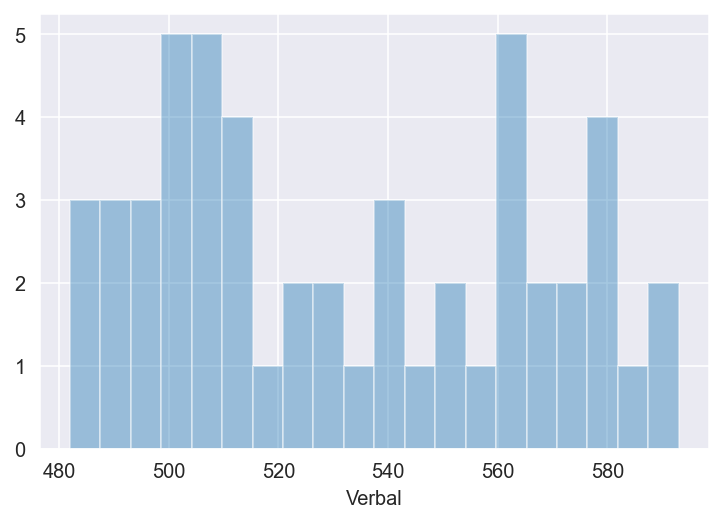

In [8]:
sns.set_style(style = 'darkgrid')
sns.distplot(df['Verbal'],bins=20,kde=False)
plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

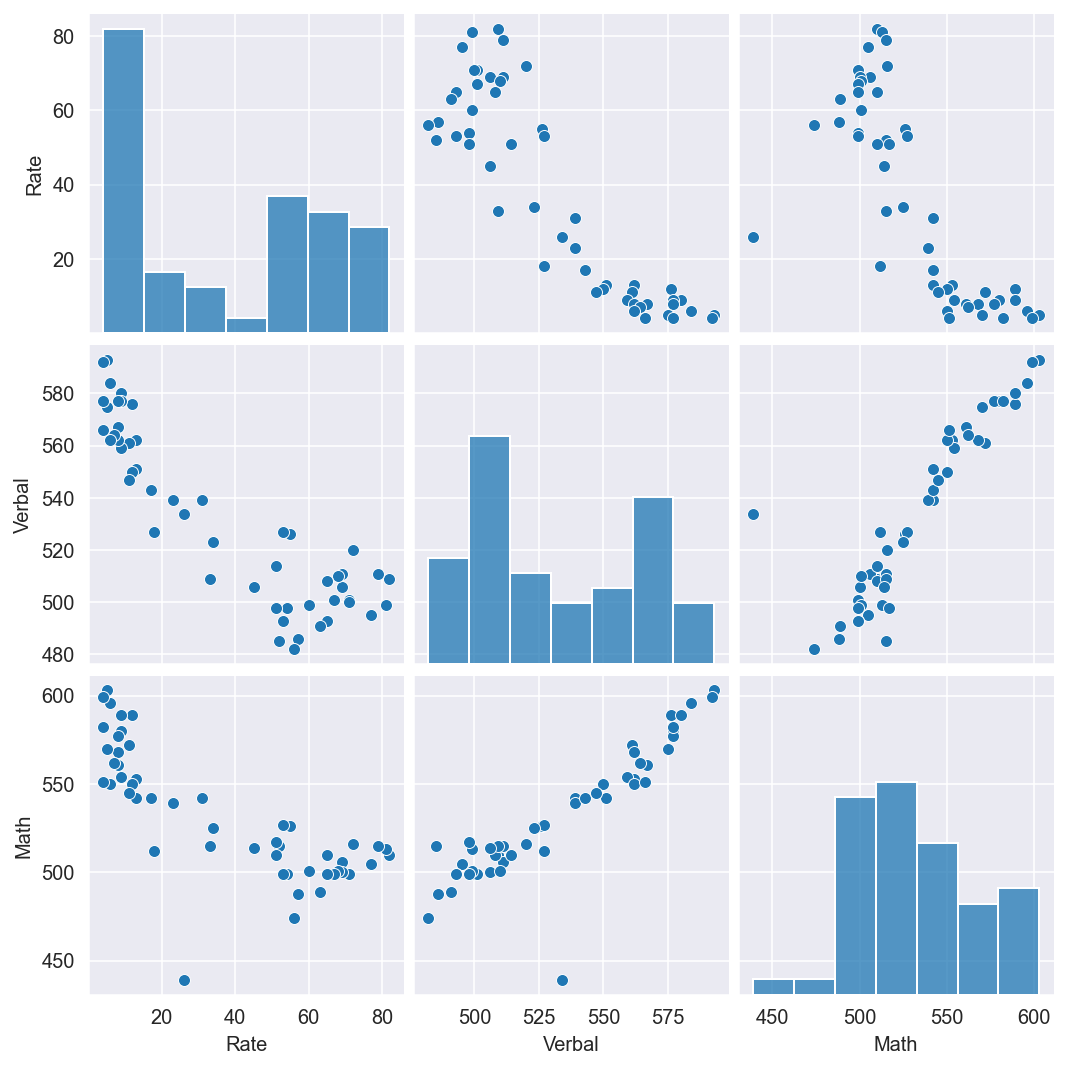

In [9]:
sns.pairplot(df)
# (hue='State')
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### Plotting a stacked histogram with `Verbal` and `Math` using pandas

<AxesSubplot:ylabel='Frequency'>

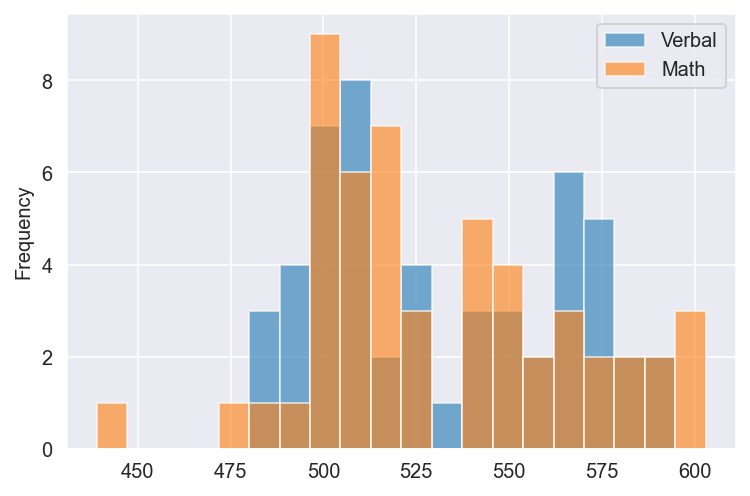

In [10]:
# # Method1
# sat['Math'].plot.hist(stacked=True)
# sat['Verbal'].plot.hist(stacked=True)

#Method2
df[['Verbal','Math']].plot.hist(alpha=0.6, bins=20)

### Plot `Verbal` and `Math` on the same chart using boxplots

<AxesSubplot:>

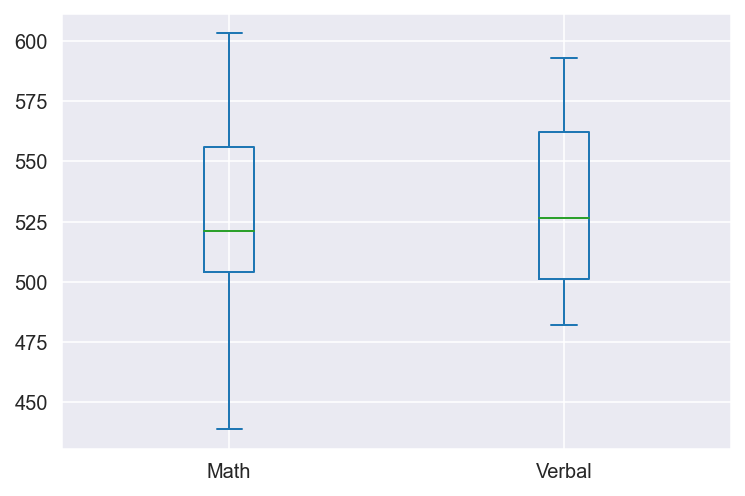

In [11]:
df.plot.box(y=['Math','Verbal'])

###  Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

<AxesSubplot:>

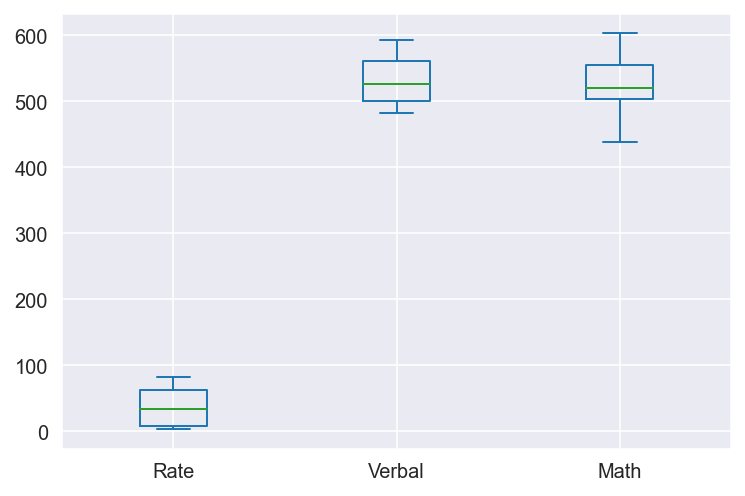

In [12]:
df.plot.box()

In [13]:
def var_standardized(var):
    var_stand = (var-var.mean())/var.std()
    return var_stand

In [14]:
sat_stand = var_standardized(df[['Rate', 'Verbal', 'Math']])

<AxesSubplot:>

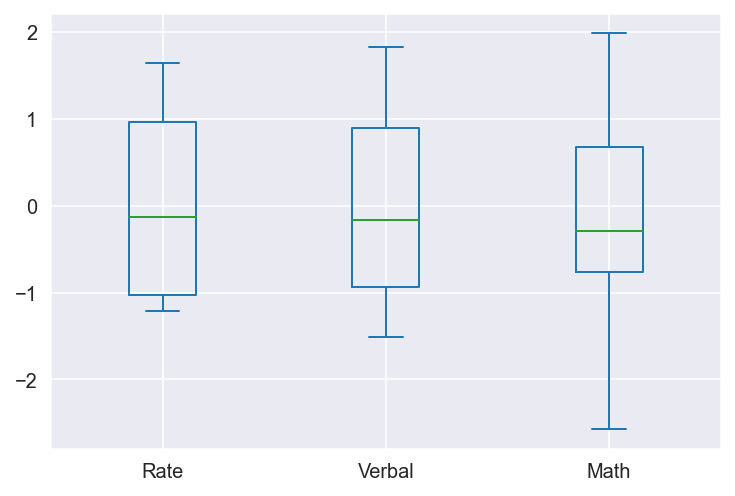

In [15]:
sat_stand.plot.box()

##  Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



###  Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [16]:
v_mean = df['Verbal'].mean()
v_mean #532.0192307692307
v_high_mean = df[['State','Verbal']][df['Verbal']> v_mean]
print(list(v_high_mean['State']))

['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [17]:
v_med = df['Verbal'].median()
v_med #526.5
v_high_med = df[['State','Verbal']][df['Verbal']> v_mean]
print(list(v_high_med['State']))

['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [18]:
df['Verbal - Math'] = df['Verbal']-df['Math']
df.head()

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [19]:
greatest_gap = df.sort_values('Verbal - Math', ascending=False).head(10)
greatest_gap

,State,Rate,Verbal,Math,Verbal - Math
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15
45,AR,6,562,550,12
32,NM,13,551,542,9
31,TN,13,562,553,9
9,VA,68,510,501,9
16,DC,56,482,474,8
8,ME,69,506,500,6
41,OK,8,567,561,6


In [20]:
lowest_gap = df.sort_values('Verbal - Math', ascending=True).head(10)
lowest_gap

,State,Rate,Verbal,Math,Verbal - Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14
33,IL,12,576,589,-13
44,WI,6,584,596,-12
36,MI,11,561,572,-11
3,NY,77,495,505,-10
47,IA,5,593,603,-10
37,MN,9,580,589,-9
51,All,45,506,514,-8


## Examine summary statistics

### Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [21]:
sat_corr = df.drop(['State'], axis = 1) #inplace? 
sat_corr = df.corr()
sat_corr

,Rate,Verbal,Math,Verbal - Math
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Verbal - Math,-0.101412,0.052600,-0.388219,1.000000


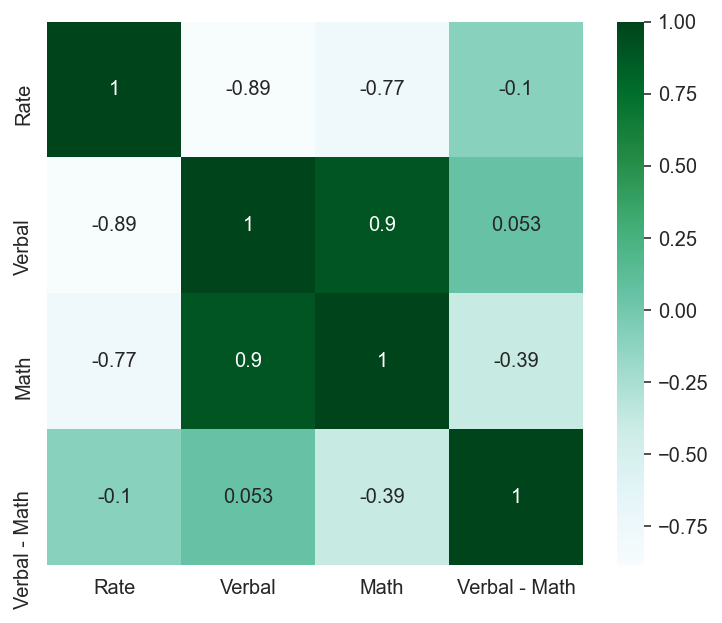

In [22]:
# annot is annotation
plt.figure(figsize=(6, 5))
# plt.yticks(rotation=0)
sns.heatmap(sat_corr, annot=True, cmap="BuGn")
plt.show()

### Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [23]:
df.describe()

,Rate,Verbal,Math,Verbal - Math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


### Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [24]:
sat_cov = df.cov()
sat_cov

,Rate,Verbal,Math,Verbal - Math
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
Verbal - Math,-43.552036,27.499623,-219.931373,247.430995


   ### 🚀Question6 Summaries
Describe how the covariance matrix is different from the correlation matrix.
- Covariance indicates the direction of the linear relationship between variables.
    - if +: LR is positive, 0: No LR, -: LR is negative
- Correlation measures both the strength and direction of the linear relationship between two variables.
What is the process to convert the covariance into the correlation?
- 1. We can write a mathematical function to process to convert the covariance into the correlation by the mathematical definition
- 2. We can use .corr() / .cov() methods
Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?
- While covariance matrix can only indicate the direction of LR, correlation can not only indicate the direction of LR but also that of the strength(how fast/slow the rate of the change is)